In [187]:
import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import cluster
from random import randint

In [188]:
path_data = "../../data"

filename_entete = "entete.csv"

# équivalent à path_data + filename_meteo et s'assure que le path est de la bonne forme
path_data_entete = os.path.join(path_data, filename_entete)
# affiche le chemin path_data_meteo
print(path_data_entete)

../../data/entete.csv


In [189]:
df_entete = pd.read_csv(path_data_entete, sep=",")

df_entete = df_entete.loc[
    df_entete["TypCde"] == "C"
]

df_entete["DateCreation"] = df_entete["DateCreation"].astype('datetime64')

df_entete = df_entete[{"CodeClient", "DateCreation"}].sort_values(['CodeClient', 'DateCreation'])

df_entete

,CodeClient,DateCreation
4363,1,2018-05-31
4364,1,2018-05-31
12045,1,2018-11-12
40737,1,2020-07-30
39220,1,2020-09-10
...,...,...
72832,14727,2022-04-06
72525,14734,2022-04-07
73029,14738,2022-04-05
73776,14750,2022-04-13


In [190]:
df_entete = df_entete.groupby("CodeClient").apply(lambda x: x["DateCreation"].diff().astype('timedelta64[D]', errors='ignore').mean()).reset_index()

df_entete.columns = ["CodeClient", "Frequence"]
df_entete.dropna(inplace=True)

df_entete

,CodeClient,Frequence
0,1,123.909091
1,3,100.857143
5,24,191.500000
6,27,110.916667
7,33,93.333333
...,...,...
2793,14599,93.000000
2794,14602,30.500000
2796,14614,138.000000
2806,14661,77.000000


<AxesSubplot:xlabel='CodeClient', ylabel='Frequence'>

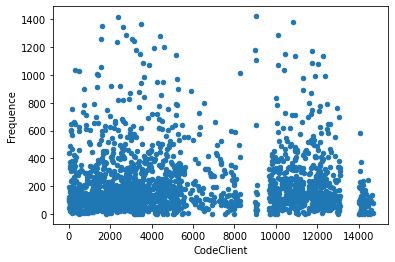

In [191]:
df_entete.plot(x="CodeClient", y="Frequence", kind="scatter")

<AxesSubplot:xlabel='CodeClient', ylabel='Frequence'>

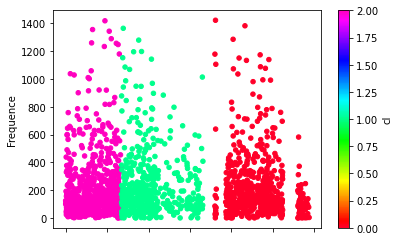

In [192]:
m = cluster.KMeans(3)
m.fit(df_entete)

df_entete['cl'] = m.labels_
df_entete.plot.scatter('CodeClient', 'Frequence', c='cl', colormap='gist_rainbow')

In [193]:
df_ca = pd.read_csv(path_data_entete, sep=",")

df_ca = df_ca .loc[
    df_ca ["TypCde"] == "C"
]

df_ca  = df_ca [{"CodeClient", "CAHT"}]

df_ca

,CAHT,CodeClient
0,2065.80,2625
1,16960.51,5505
4,1748.40,10497
8,17951.01,10721
10,2083.47,1826
...,...,...
73982,0.00,1775
73986,0.00,10487
73990,0.00,2162
73994,0.00,1378


In [194]:
df_ca = df_ca.groupby("CodeClient")["CAHT"].sum().reset_index()

df_ca

,CodeClient,CAHT
0,1,5008.42
1,3,31904.05
2,12,2889.90
3,13,1135.78
4,22,2253.28
...,...,...
2819,14727,1384.46
2820,14734,5458.58
2821,14738,460.34
2822,14750,0.00


In [195]:
df_frequence = pd.merge(df_entete, df_ca, how = 'inner', on = 'CodeClient')[{"Frequence", "CAHT"}]

df_frequence

,CAHT,Frequence
0,5008.42,123.909091
1,31904.05,100.857143
2,1759.32,191.500000
3,9712.99,110.916667
4,17493.95,93.333333
...,...,...
1791,1162.15,93.000000
1792,8520.65,30.500000
1793,2604.04,138.000000
1794,5398.71,77.000000


<AxesSubplot:xlabel='CAHT', ylabel='Frequence'>

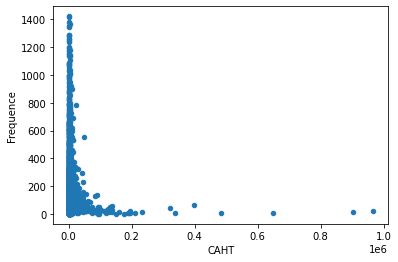

In [197]:
df_frequence.plot(x="CAHT", y="Frequence", kind="scatter")

<AxesSubplot:xlabel='CAHT', ylabel='Frequence'>

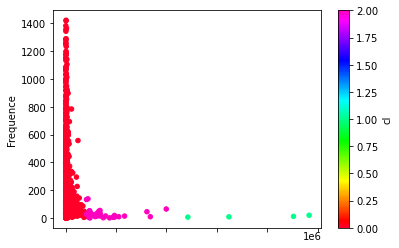

In [198]:
m = cluster.KMeans(3)
m.fit(df_frequence)

df_frequence['cl'] = m.labels_
df_frequence.plot.scatter('CAHT', 'Frequence', c='cl', colormap='gist_rainbow')

In [199]:
df_frequence = df_frequence.loc[
    df_frequence["CAHT"] < 250000
]

<AxesSubplot:xlabel='CAHT', ylabel='Frequence'>

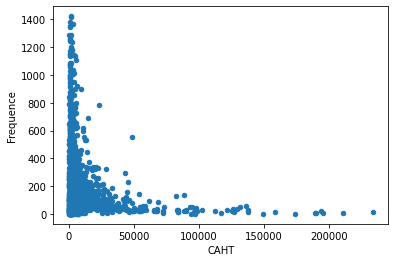

In [200]:
df_frequence.plot(x="CAHT", y="Frequence", kind="scatter")

/var/folders/36/43f3rdln6_jby4rr0llzz6yh0000gn/T/ipykernel_20313/2573321764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequence['cl'] = m.labels_


<AxesSubplot:xlabel='CAHT', ylabel='Frequence'>

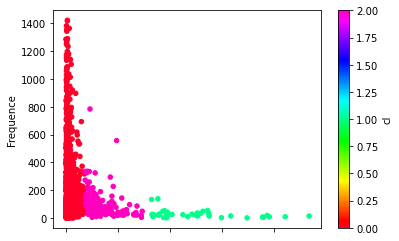

In [201]:
m = cluster.KMeans(3)
m.fit(df_frequence)

df_frequence['cl'] = m.labels_
df_frequence.plot.scatter('CAHT', 'Frequence', c='cl', colormap='gist_rainbow')

In [202]:
df_frequence = df_frequence.loc[
    df_frequence["CAHT"] < 50000
]

<AxesSubplot:xlabel='CAHT', ylabel='Frequence'>

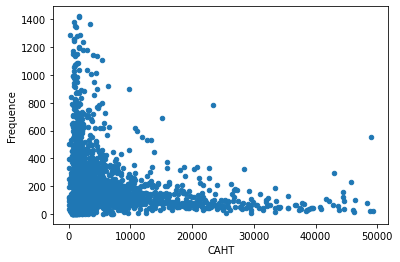

In [203]:
df_frequence.plot(x="CAHT", y="Frequence", kind="scatter")

/var/folders/36/43f3rdln6_jby4rr0llzz6yh0000gn/T/ipykernel_20313/76470660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequence['cl'] = m.labels_


<AxesSubplot:xlabel='CAHT', ylabel='Frequence'>

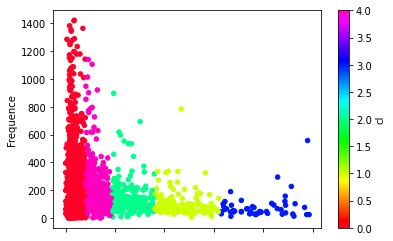

In [205]:
m = cluster.KMeans(5)
m.fit(df_frequence)

df_frequence['cl'] = m.labels_
df_frequence.plot.scatter('CAHT', 'Frequence', c='cl', colormap='gist_rainbow')